## 1. Data Cleaning
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import atoti as tt

Welcome to atoti 0.7.2!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [2]:
df = pd.read_csv('../Data/Bank_Customer_Churn_Data.csv')

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check for null
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# Check what is under 'country'
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
# Check what is under 'gender'
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
# save data
df.to_csv('../Data/df.csv', index=False)

<AxesSubplot:>

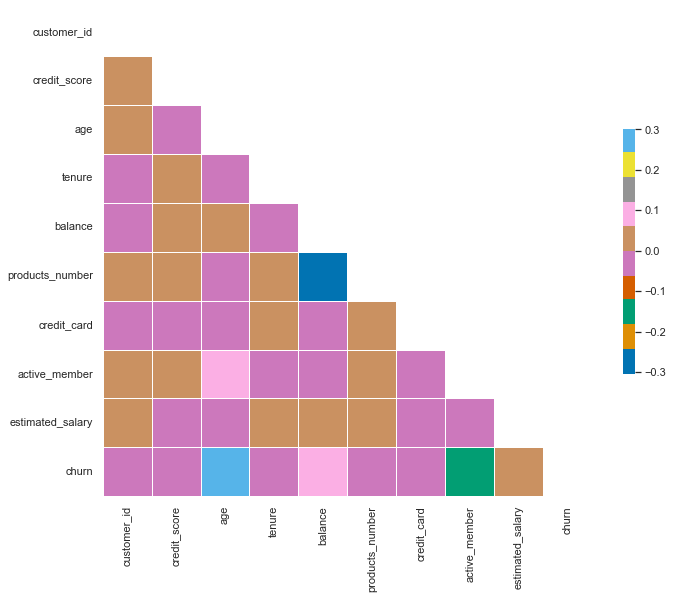

In [9]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='white')

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette('colorblind')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

## 2. Data Exploratory
---

In [10]:
# Split data to train/test sets

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42)

In [11]:
# save train data
df_train.to_csv('../Data/df_train.csv', index=False)

In [12]:
# save test data
df_test.to_csv('../Data/df_test.csv', index=False)

In [13]:
sns.set_style('whitegrid')

There are about 6,500 data who will not churn and 1,500 data who will churn.<br>
As there is an imbalance data, we will have to balance the data.

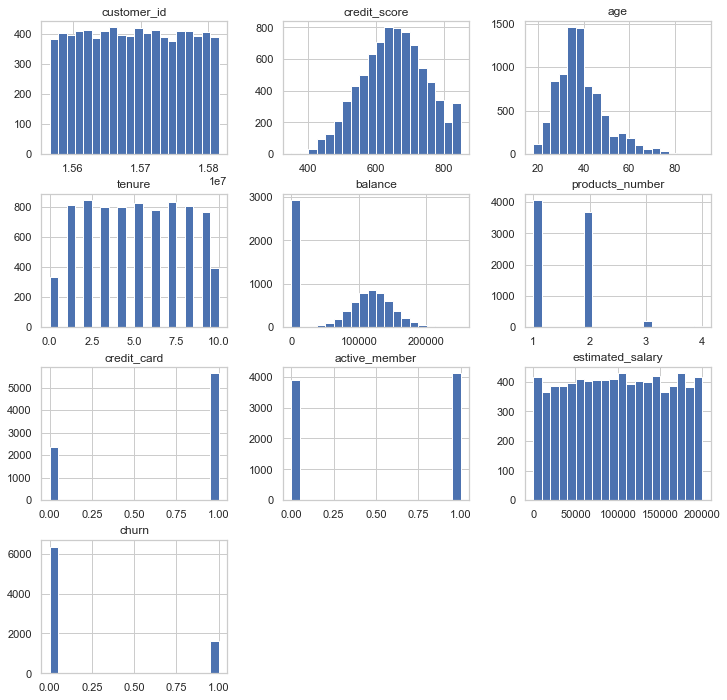

In [14]:
df_train.hist(figsize=(12,12),bins=20)
plt.show()

**Credit Score**<br>
Marjority has credit score between 610 and 700.<br>
<br>
**Age**<br>
Marjority are aged between 36 and 40.<br>
<br>
**Balance**<br>
Zero-balance customers seem to be the outlier.<br>
Exclusing zero-balance customers, marjority has balances bewteen around 800 and 900<br>
<br>
**Number of Products**<br>
Majority has either one or two products.<br>
<br>
**Credit Card**<br>
Majority has credit cards.

In [15]:
df_train[df_train['churn']==1].groupby('active_member')[['active_member']].count()/df_train[df_train['churn']==1][['active_member']].count()

,active_member
active_member,
0,0.641119
1,0.358881


About 64% of the churned customers are not active member.

In [16]:
df_train[df_train['churn']==0].groupby('active_member')[['active_member']].count()/df_train[df_train['churn']==0][['active_member']].count()

,active_member
active_member,
0,0.447451
1,0.552549


About 45% of the customers who did not churn are not active member.

In [17]:
df_train.groupby('active_member')[['active_member']].count()/df_train['active_member'].count()

,active_member
active_member,
0,0.48725
1,0.51275


About 49% of the total customers not active member.

In [18]:
df_train[df_train['churn']==1].groupby('credit_card')[['credit_card']].count()/df_train[df_train['churn']==1][['credit_card']].count()

,credit_card
credit_card,
0,0.302311
1,0.697689


About 70% of the churned customers have credit cards.

In [19]:
df_train[df_train['churn']==0].groupby('credit_card')[['credit_card']].count()/df_train[df_train['churn']==0][['credit_card']].count()

,credit_card
credit_card,
0,0.294997
1,0.705003


About 70% of the customers who did not churn have credit cards.

In [20]:
df_train.groupby('credit_card')[['credit_card']].count()/df_train['credit_card'].count()

,credit_card
credit_card,
0,0.2965
1,0.7035


About 70% of the total customers have credit cards.

Since the percentage of total number of customer who have credit card is the same the percentage for churned and non-churned customers who have credit card, credit card is unlikely a contributing factor to churn rate.

In [21]:
df_train[df_train['churn']==1].groupby('country')[['country']].count()/df_train[df_train['churn']==1][['country']].count()

,country
country,
France,0.394769
Germany,0.395985
Spain,0.209246


Of the churned customers, about 40% are from France, 40% are from Germany and the remaining 20% are from Spain.

In [22]:
df_train[df_train['churn']==0].groupby('country')[['country']].count()/df_train[df_train['churn']==0][['country']].count()

,country
country,
France,0.526274
Germany,0.213971
Spain,0.259755


Of the non-churn customers, about 53% are from France, 21% are from Germany and the remaining 26% are from Spain.

In [23]:
df_train.groupby('country')[['country']].count()/df_train['country'].count()

,country
country,
France,0.499250
Germany,0.251375
Spain,0.249375


Of all customers, about 50% are from France, 25% are from Germany and the remaining 25% are from Spain.

In [24]:
df_train[df_train['churn']==1].groupby('products_number')[['products_number']].count()/df_train[df_train['churn']==1][['products_number']].count()

,products_number
products_number,
1,0.691606
2,0.170925
3,0.110097
4,0.027372


The above table shows the number of products that churned customers have.

In [25]:
df_train[df_train['churn']==0].groupby('products_number')[['products_number']].count()/df_train[df_train['churn']==0][['products_number']].count()

,products_number
products_number,
1,0.458622
2,0.536344
3,0.005035


The above table shows the number of products that non-churn customers have.

In [26]:
df_train.groupby('products_number')[['products_number']].count()/df_train['products_number'].count()

,products_number
products_number,
1,0.506500
2,0.461250
3,0.026625
4,0.005625


The above table shows the number of products of all customers.

In [27]:
df_train[df_train['balance']==0][['churn']].value_counts().reset_index()

,churn,0
0,0,2512
1,1,406


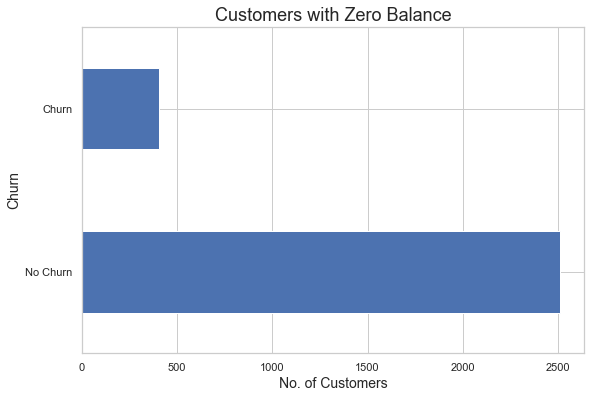

In [28]:
ax = plt.subplots(figsize=(9,6))

ax = df_train[df_train['balance']==0][['churn']].value_counts().plot(kind='barh')

ax.set_title('Customers with Zero Balance',size= 18)
ax.set_yticklabels(['No Churn','Churn'])
ax.set_xlabel('No. of Customers', size=14)
ax.set_ylabel('Churn', size=14)

plt.show()

Majority of the customers with zero balances did not churn.

In [29]:
df_train[(df_train['churn']==0)&(df_train['balance']==0)].count()/df_train[(df_train['churn']==0)].count()

customer_id         0.395217
credit_score        0.395217
country             0.395217
gender              0.395217
age                 0.395217
tenure              0.395217
balance             0.395217
products_number     0.395217
credit_card         0.395217
active_member       0.395217
estimated_salary    0.395217
churn               0.395217
dtype: float64

In [30]:
df_train[(df_train['churn']==0)&(df_train['balance']!=0)].count()/df_train[(df_train['churn']==0)].count()

customer_id         0.604783
credit_score        0.604783
country             0.604783
gender              0.604783
age                 0.604783
tenure              0.604783
balance             0.604783
products_number     0.604783
credit_card         0.604783
active_member       0.604783
estimated_salary    0.604783
churn               0.604783
dtype: float64

In [31]:
df_train[(df_train['churn']==0)&(df_train['balance']==0)].groupby('gender')[['age','credit_score','estimated_salary','products_number']].mean()

,age,credit_score,estimated_salary,products_number
gender,,,,
Female,37.596539,651.176685,100985.450893,1.821494
Male,37.122348,651.099717,97053.201945,1.831683


In [32]:
df_train[(df_train['churn']==0)&(df_train['balance']!=0)].groupby('gender')[['age','credit_score','estimated_salary','products_number']].mean()

,age,credit_score,estimated_salary,products_number
gender,,,,
Female,37.204195,655.007403,100540.697378,1.370142
Male,37.573549,653.885290,101315.832200,1.357625


In [33]:
df_train[(df_train['churn']==1)].groupby('gender')[['age','credit_score','estimated_salary','products_number','balance','tenure']].mean()

,age,credit_score,estimated_salary,products_number,balance,tenure
gender,,,,,,
Female,44.738847,647.729053,103741.728640,1.517954,89222.517758,4.952122
Male,44.773793,644.023448,99027.381283,1.416552,92447.399848,4.897931


In [34]:
df_train[(df_train['churn']==0)].groupby('gender')[['age','credit_score','estimated_salary','products_number','balance','tenure']].mean()

,age,credit_score,estimated_salary,products_number,balance,tenure
gender,,,,,,
Female,37.362633,653.460463,100720.299937,1.552409,70666.780725,4.965796
Male,37.398130,652.802310,99658.598441,1.541930,73592.048848,5.066538


In [35]:
df_train[(df_train['churn']==1)].groupby('country')[['age','credit_score','estimated_salary','products_number','balance','tenure']].mean()

,age,credit_score,estimated_salary,products_number,balance,tenure
country,,,,,,
France,45.258860,645.035439,102650.704946,1.468413,70775.959738,4.955316
Germany,44.850998,646.829493,99083.015929,1.448541,120449.536912,5.009217
Spain,43.619186,646.703488,104680.666192,1.529070,71725.617180,4.723837


In [36]:
df_train[(df_train['churn']==0)].groupby('country')[['age','credit_score','estimated_salary','products_number','balance','tenure']].mean()

,age,credit_score,estimated_salary,products_number,balance,tenure
country,,,,,,
France,37.189836,651.848132,99776.048741,1.543797,59768.282114,5.009865
Germany,37.190441,654.711765,102831.235559,1.552941,119851.856566,4.985294
Spain,37.932768,654.246517,98555.696342,1.546336,58675.850909,5.082374


In [37]:
df_train.groupby('churn')[['age','credit_score','estimated_salary','products_number','balance','tenure']].mean()

,age,credit_score,estimated_salary,products_number,balance,tenure
churn,,,,,,
0,37.382945,653.083858,100112.778172,1.546413,72340.663696,5.023442
1,44.754258,646.094891,101662.712926,1.473236,90644.682914,4.928224


In [38]:
df_train[['age','credit_score','estimated_salary','products_number','balance']].mean()

age                     38.897750
credit_score           651.647625
estimated_salary    100431.289764
products_number          1.531375
balance              76102.139645
dtype: float64

In [39]:
session = tt.Session()

In [40]:
df_train1 = session.read_csv('../Data/df_train.csv', keys=["churn","country","gender"])

In [41]:
cube = session.create_cube(df_train1)

In [42]:
h = cube.hierarchies
h

{('Df_train', 'country'): <atoti.hierarchy.Hierarchy object at 0x0000020B4E1CC0A0>, ('Df_train', 'churn'): <atoti.hierarchy.Hierarchy object at 0x0000020B4E1CC9D0>, ('Df_train', 'gender'): <atoti.hierarchy.Hierarchy object at 0x0000020B4E1B21F0>}

In [43]:
l = cube.levels

In [44]:
m = cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x0000020B4E1E8EB0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x0000020B4E1CC040>, 'credit_score.SUM': <atoti.measure.Measure object at 0x0000020B4E31DC70>, 'credit_score.MEAN': <atoti.measure.Measure object at 0x0000020B4E31DDC0>, 'active_member.SUM': <atoti.measure.Measure object at 0x0000020B4E31DF70>, 'active_member.MEAN': <atoti.measure.Measure object at 0x0000020B4E31D9D0>, 'estimated_salary.SUM': <atoti.measure.Measure object at 0x0000020B4E31D790>, 'estimated_salary.MEAN': <atoti.measure.Measure object at 0x0000020B4E31DBE0>, 'balance.SUM': <atoti.measure.Measure object at 0x0000020B4E31D2E0>, 'balance.MEAN': <atoti.measure.Measure object at 0x0000020B4E31DF10>, 'tenure.SUM': <atoti.measure.Measure object at 0x0000020B4E31DFD0>, 'tenure.MEAN': <atoti.measure.Measure object at 0x0000020B4E31DC40>, 'age.SUM': <atoti.measure.Measure object at 0x0000020B4E31D7C0>, 'age.MEAN': <atoti.measure.Measure object at 0x0000020B4E31DFA0>, 'products_number.SUM': <atoti.measure.Measure object at 0x0000020B4E31DE20>, 'products_number.MEAN': <atoti.measure.Measure object at 0x0000020B4E31D820>, 'credit_card.SUM': <atoti.measure.Measure object at 0x0000020B4E31D7F0>, 'credit_card.MEAN': <atoti.measure.Measure object at 0x0000020B4E31DF40>, 'customer_id.SUM': <atoti.measure.Measure object at 0x0000020B4E1F23A0>, 'customer_id.MEAN': <atoti.measure.Measure object at 0x0000020B4E1F2310>}

In [45]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [46]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Customers who churn are generally younger.

In [47]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Females who churn have a lower credit score than females who don't churn.<br>
Males who churn have a higher credit score than males who don't churn.

In [48]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Females who churn earn higher salary than females who don't churn.<br>
Males who churn earn lower salary than males who don't churn.<br>
In general, females earn lower salary than males, which could be the possible reason for the lower credit score.

In [49]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Both females and male who churn have lower balances than those who don't churn.

In [50]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [51]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Both females and male who churn have lower tenure than those who don't churn.